In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import fashion_mnist

In [26]:
# fashion_mnist dataset 로딩
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [27]:
# 레이블 개수 계산
num_labels = len(np.unique(y_train))

In [28]:
# one-hot vector로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
# 입력 이미지 차원
image_size = x_train.shape[1]

In [30]:
# 크기 조정, 정규화
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [31]:
# 신경망 하이퍼파라미터
# 이미지는 그대로 (정사각형 회식) 처리됨
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [32]:
# 모델: CNN-ReLU-MaxPooling 순서로 쌓기
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',input_shape=input_shape))
model.add(Flatten())

In [33]:
# regularizer: dropout
model.add(Dropout(dropout))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

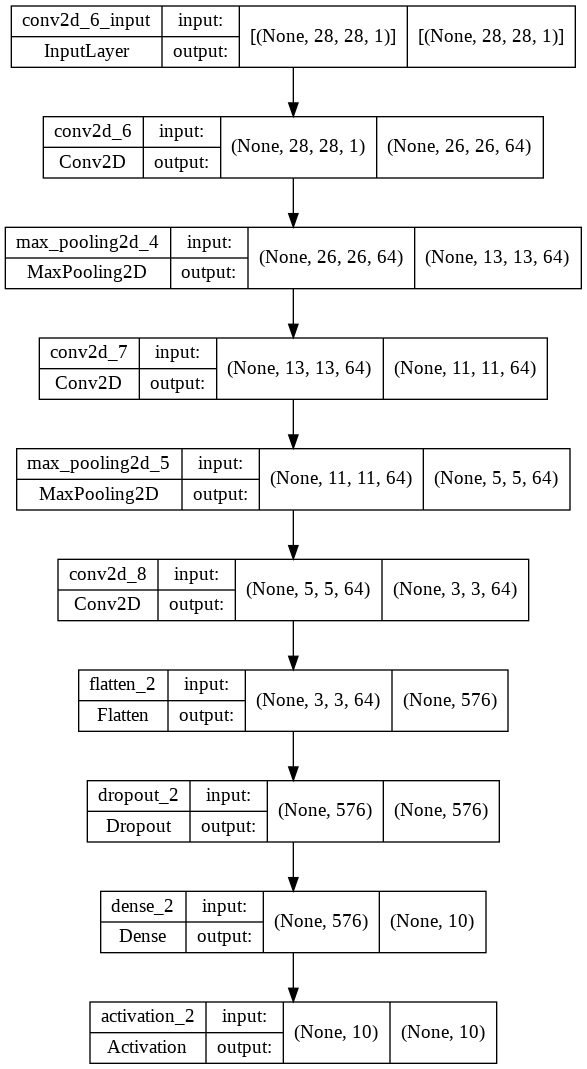

In [34]:
# 출력: 10차원 one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [35]:
# one-hot vector의 손실함수
# 최적화: adam optimizer
# 분류 평가 지표: accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
# 훈련
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 75s 158ms/step - loss: 0.6481 - accuracy: 0.7621
Epoch 2/10
469/469 [==============================] - 75s 161ms/step - loss: 0.4110 - accuracy: 0.8506
Epoch 3/10
469/469 [==============================] - 74s 158ms/step - loss: 0.3532 - accuracy: 0.8721
Epoch 4/10
469/469 [==============================] - 72s 154ms/step - loss: 0.3183 - accuracy: 0.8848
Epoch 5/10
469/469 [==============================] - 72s 154ms/step - loss: 0.2941 - accuracy: 0.8942
Epoch 6/10
469/469 [==============================] - 72s 154ms/step - loss: 0.2766 - accuracy: 0.8992
Epoch 7/10
469/469 [==============================] - 73s 156ms/step - loss: 0.2631 - accuracy: 0.9042
Epoch 8/10
469/469 [==============================] - 72s 154ms/step - loss: 0.2508 - accuracy: 0.9087
Epoch 9/10
469/469 [==============================] - 72s 154ms/step - loss: 0.2404 - accuracy: 0.9119
Epoch 10/10
469/469 [==============================] - 72s 154ms/step - l

In [37]:
# 테스트 테이터셋으로 일반화 검증
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 90.7%
